In [134]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [136]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [137]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [139]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [140]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [141]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

RowNumber - 10000
CustomerId - 10000
Surname - 2932
CreditScore - 460
Geography - 3
Gender - 2
Age - 70
Tenure - 11
Balance - 6382
NumOfProducts - 4
HasCrCard - 2
IsActiveMember - 2
EstimatedSalary - 9999
Exited - 2


In [103]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [142]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)


<Axes: xlabel='CreditScore', ylabel='Density'>

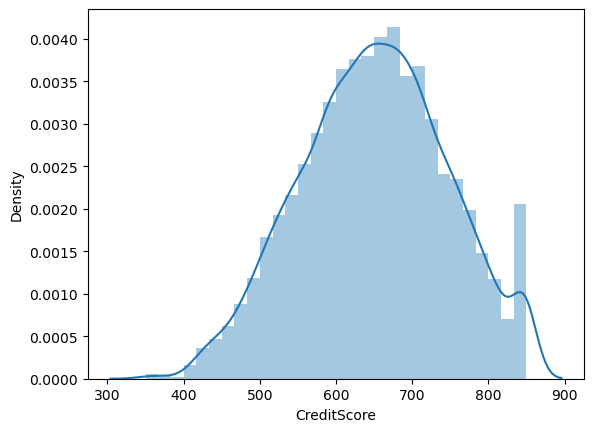

In [143]:
sns.distplot(df['CreditScore'], bins=30)


<Axes: xlabel='Age', ylabel='Density'>

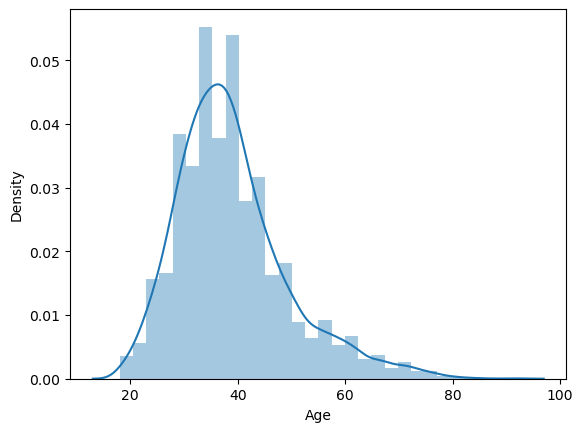

In [144]:
sns.distplot(df['Age'], bins=30)

<Axes: xlabel='Balance', ylabel='Density'>

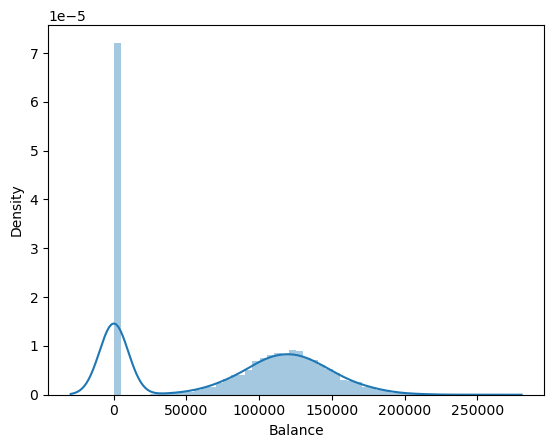

In [145]:
sns.distplot(df['Balance'], bins=50)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

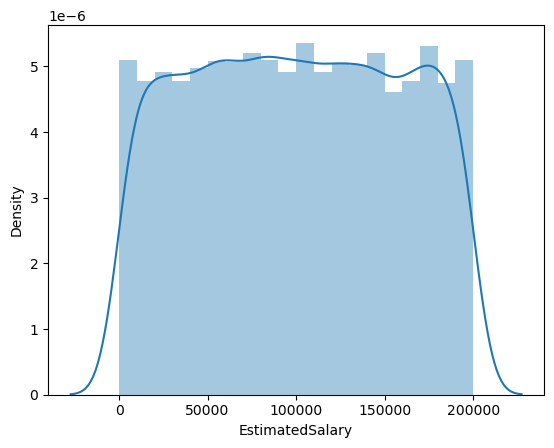

In [146]:
sns.distplot(df['EstimatedSalary'], bins=20)

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

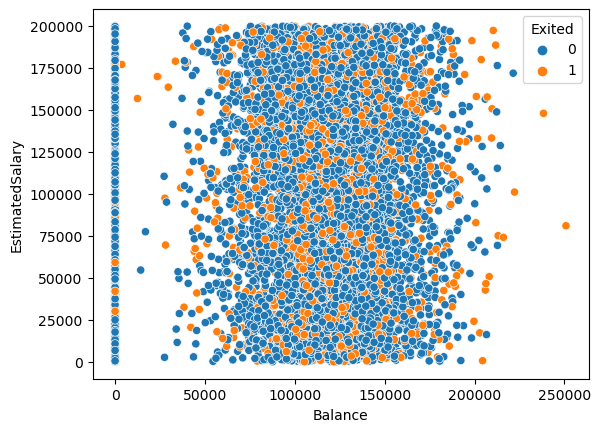

In [147]:
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited',data=df)

<Axes: xlabel='Age', ylabel='Balance'>

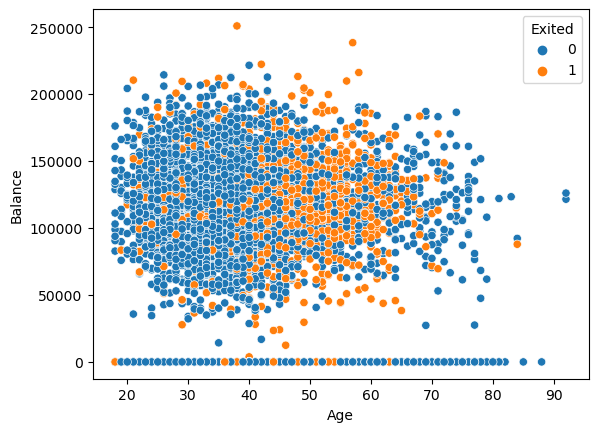

In [148]:
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df)

In [149]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [150]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<Axes: >

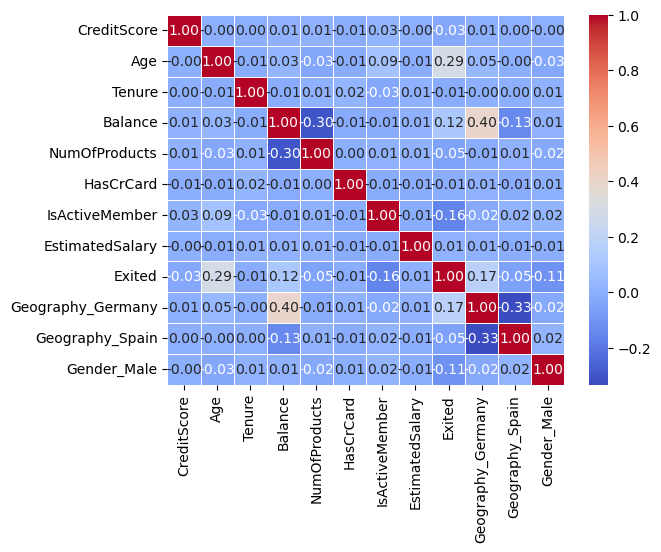

In [151]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [152]:
from sklearn.preprocessing import StandardScaler

In [115]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [153]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X,y=sm.fit_resample(X,y)
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [167]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [156]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [168]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [169]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 3)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 3s 4ms/step - loss: 0.6154 - accuracy: 0.6512 - val_loss: 0.5121 - val_accuracy: 0.7637
Epoch 2/100
319/319 [==============================] - 1s 5ms/step - loss: 0.4881 - accuracy: 0.7745 - val_loss: 0.4537 - val_accuracy: 0.8010
Epoch 3/100
319/319 [==============================] - 2s 5ms/step - loss: 0.4533 - accuracy: 0.7962 - val_loss: 0.4305 - val_accuracy: 0.8089
Epoch 4/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4321 - accuracy: 0.8062 - val_loss: 0.4138 - val_accuracy: 0.8179
Epoch 5/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4170 - accuracy: 0.8134 - val_loss: 0.4003 - val_accuracy: 0.8214
Epoch 6/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.8188 - val_loss: 0.3931 - val_accuracy: 0.8257
Epoch 7/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4004 - accuracy: 0.8208 - val_loss: 0.3888 - val_accuracy: 0.8332

In [171]:
y_rec = model.predict(X_test)

100/100 [==============================] - 0s 1ms/step


In [172]:
y_pred = np.where(y_rec>=0.5,1,0)

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8248587570621468

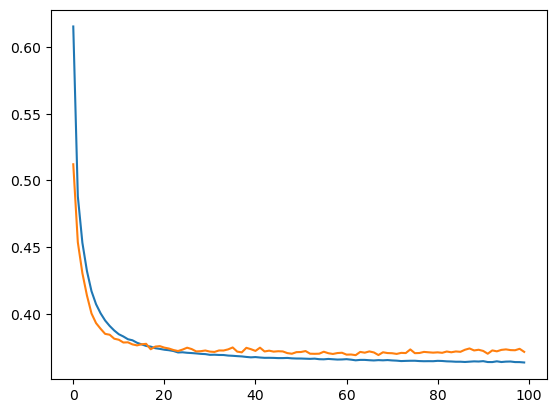

In [174]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

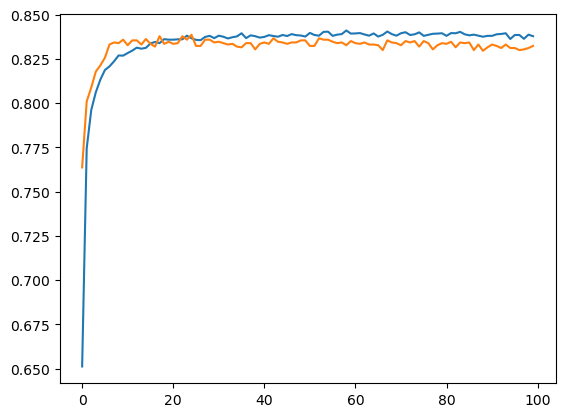

In [175]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [176]:
from sklearn import svm
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(),{'C' :[1,10],'kernel' :['linear', 'poly', 'rbf'],'degree' :[1,2,3],'gamma' :['scale','auto']},cv=11,return_train_score=False)

In [177]:
clf.fit(X_train[:1000],y_train[0:1000])
pd.set_option('display.max_colwidth',-1)
res = clf.cv_results_
#result = pd.DataFrame(res)
result[['params','rank_test_score']]


,params,rank_test_score
0,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}",7
1,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}",21
2,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}",1
3,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}",7
4,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}",21
5,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}",1
6,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}",7
7,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}",35
8,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}",1
9,"{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}",7


In [178]:
X.value_counts().sum()

15926

In [ ]:
#{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [179]:
modsvm = svm.SVC(kernel = 'rbf', degree = 1, gamma = 'scale' , C =1)

In [180]:
modsvm.fit(X_train,y_train)

SVC(C=1, degree=1)

In [181]:
y_pred2 = modsvm.predict(X_test)

In [182]:
accuracy_score(y_pred2,y_test)

0.8261142498430634

In [ ]:
#better model is ANN = 0.8248587570621468 AND SVM = 0.8261142498430634 so almost same.